In [1]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
def mix_gaussian_moments(mus, stds):
    mu_star = np.mean(mus)
    std_star = np.sqrt(np.mean([s**2 + m**2 for m, s in zip(mus, stds)]) - mu_star**2)
    return mu_star, std_star

# Mix CL1

In [2]:
with open('results/split_mnist_hibp_l2_mix_alpha020_up_.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()
d['vcl_ibp'].shape

(2, 1, 6, 6)

In [3]:
with open('results/split_mnist_rs_hibp_l2_lambda_search_a.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
print(d_rs.keys())
print([np.nanmean(d_rs['vcl_ibp'][i,:,:,:]) for i in range(2)])

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts'])
[0.8134586187523036, 0.8146142011619217]


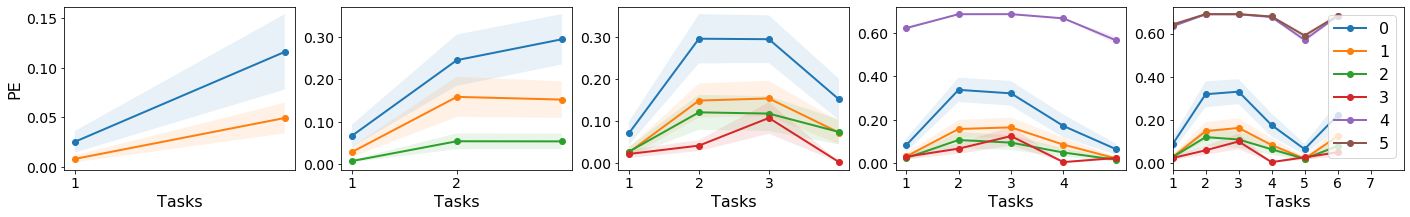

In [4]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
runs=5
no_tasks=6
fig, ax = plt.subplots(1, no_tasks-1, figsize=(24, 3))
for i in range(no_tasks-1):
    task = i+1
    num_heads = task+1
    mus, sds = np.zeros((runs, (task+1)*num_heads)), np.zeros((runs, (task+1)*num_heads))
    for r in range(runs):
        uncert = d_rs['uncerts_ibp'][r]
        mu, sd = zip(*uncert[task])
        mus[r, :] = mu
        sds[r, :] = sd
    _mu = np.mean(mus, 0)
    _sd = np.mean(sds**2 + mus**2, 0) - _mu**2
    for j in range(num_heads):
        start = j*num_heads
        end = (j+1)*num_heads
        ax[i].plot(np.arange(num_heads)+1, _mu[start:end], label=str(j), marker='o', linewidth=lw)
        ax[i].fill_between(np.arange(num_heads)+1, 
                           [m+s for m, s in zip(_mu[start:end], _sd[start:end])], 
                           [m-s for m, s in zip(_mu[start:end], _sd[start:end])], alpha=0.1)
    ax[i].set_xticks(range(1, num_heads))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    #ax[i].set_ylim((0.1, 0.6))
    if i == 4:
        ax[i].set_xticks(range(1, num_heads+2))
        ax[i].set_xlim((1, 8))
        ax[i].legend(fontsize=legend_size, loc='upper right')
    if i == 0:
        ax[i].set_ylabel('PE', fontsize=legend_size)
#plt.savefig("plots/vvv.pdf", bbox_inches='tight')
fig.show()

In [5]:
cl1 = True
ind = 0 if cl1 else 1
[np.nanmean(d['vcl_baselines'][i][ind,:,:,:]) for i in d['vcl_baselines'].keys()]

[0.825797399772065, 0.8101746424023683, 0.8650052495123375]

In [6]:
with open('results/split_mnist_hibp_l2_mix_alpha020_up_r4_.pkl', 'rb') as input_file:
    d_more = pickle.load(input_file)
d_more.keys()
d_more['vcl_ibp'].shape

(2, 4, 6, 6)

In [7]:
hibp_accs = np.concatenate((d['vcl_ibp'], d_more['vcl_ibp']), axis=1)
hibp_accs.shape

(2, 5, 6, 6)

In [8]:
with open('results/split_mnist_ns_mix_hibp_alpha_beta_1_up.pkl', 'rb') as input_file:
    d_bl = pickle.load(input_file)
d_bl.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [9]:
d_bl['vcl_baselines'][400].shape

(2, 1, 6, 6)

In [10]:
cl1 = True
ind = 0 if cl1 else 1
[np.nanmean(d_bl['vcl_baselines'][i][ind,:,:,:]) for i in d_bl['vcl_baselines'].keys()]

[0.8130451804803064, 0.7665698037800168, 0.8602737325376698]

In [11]:
with open('results/split_mnist_split_mix_bl_r4_.pkl', 'rb') as input_file:
    d_bl_more = pickle.load(input_file)
d_bl_more.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [12]:
cl1 = True
ind = 0 if cl1 else 1
[np.nanmean(d_bl_more['vcl_baselines'][i][ind, :,:,:]) for i in d_bl_more['vcl_baselines'].keys()]

[0.825743395380587, 0.8232926498721576, 0.8615802262155783]

In [13]:
bl_accs = {}
for i in d_bl_more['vcl_baselines'].keys():
    bl_accs[i] = np.concatenate((d_bl['vcl_baselines'][i], d_bl_more['vcl_baselines'][i]), axis=1)
bl_accs[50].shape

(2, 5, 6, 6)

In [24]:
with open('results/split_mnist_ibp_l2_mix_alpha020_.pkl', 'rb') as input_file:
    d_ibp = pickle.load(input_file)
d_ibp.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [25]:
print([np.nanmean(d_ibp['vcl_ibp'][i,:,:,:]) for i in range(2)])

[0.7883795767357307, 0.7739651299658276]


In [32]:
with open('results/split_mnist_rs_ibp_l2_mix.pkl', 'rb') as input_file:
    d_ibp_rs = pickle.load(input_file)
d_ibp_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts', 'opt_thetas'])

In [33]:
print([np.nanmean(d_ibp_rs['vcl_ibp'][i,:,:,:]) for i in range(2)])

[0.8083334280000556, 0.7870956471522472]


In [34]:
d_ibp_rs['opt_thetas']

{'lambda_1': 1.75,
 'lambda_2': 1.5,
 'a_start': 5.0,
 'a_step': 3.0,
 'alpha0': 17.79263023399222,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 512.0,
 'beta0': 1.0,
 'learning_rate': 0.001,
 'prior_var': 0.7,
 'no_epochs': 1000.0}

In [44]:
cl1 = False
ind = 0 if cl1 else 1
hibp_acc = hibp_accs
hibp_rs_acc = d_rs['vcl_ibp'][ind,:,:,:]
ibp_acc = d_ibp['vcl_ibp'] 
ibp_rs_acc = d_ibp_rs['vcl_ibp'][ind,:,:,:]
vcl_result_h50 = bl_accs[50]
vcl_result_h100 = bl_accs[100]
vcl_result_h400 = bl_accs[400]
_hibp_acc = np.mean(hibp_acc[ind, :, :, :], 0)
_hibp_rs_acc = np.mean(hibp_rs_acc, 0)
_ibp_acc = np.mean(ibp_acc[ind, :, :, :], 0)
_ibp_rs_acc = np.mean(ibp_rs_acc, 0)
_vcl_result_h50 = np.mean(vcl_result_h50[ind, :, :, :], 0)
_vcl_result_h100 = np.mean(vcl_result_h100[ind, :, :, :], 0)
_vcl_result_h400 = np.mean(vcl_result_h400[ind, :, :, :], 0)
__hibp_acc = np.nanmean(hibp_acc[ind, :, :, :], (0,1))
__hibp_rs_acc = np.nanmean(hibp_rs_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc[ind, :, :, :], (0,1))
__ibp_rs_acc = np.nanmean(ibp_rs_acc, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50[ind, :, :, :], (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100[ind, :, :, :], (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400[ind, :, :, :], (0,1))

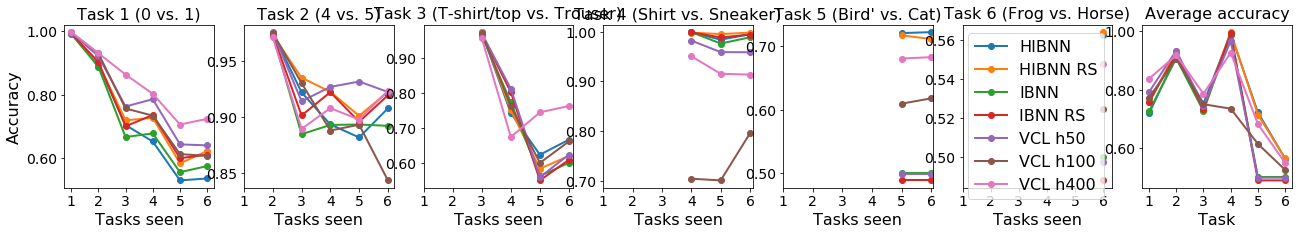

In [45]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (4 vs. 5)",
          2: "Task 3 (T-shirt/top vs. Trouser)",
          3: "Task 4 (Shirt vs. Sneaker)",
          4: "Task 5 (Bird' vs. Cat)",
          5: "Task 6 (Frog vs. Horse)"}
no_tasks=6
fig, ax = plt.subplots(1, 7, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='HIBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_hibp_rs_acc[:, i]))+1, _hibp_rs_acc[:, i], label='HIBNN RS', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_rs_acc[:, i]))+1, _ibp_rs_acc[:, i], label='IBNN RS', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_hibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 5:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[6].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='HIBNN', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__hibp_rs_acc))+1, __hibp_rs_acc, label='HIBNN RS', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__ibp_rs_acc))+1, __ibp_rs_acc, label='IBNN RS', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h50, label='VCL 50', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h100, label='VCL 100', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h400, label='VCL 400', marker='o', linewidth=lw)
ax[6].set_xticks(range(1, len(_hibp_acc)+1))
ax[6].set_title('Average accuracy', fontsize=legend_size)
ax[6].set_xlabel('Task', fontsize=legend_size)
ax[6].tick_params(labelsize=tick_size)
ax[6].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_hibp_cifar_mh_l1.pdf", bbox_inches='tight')
fig.show()

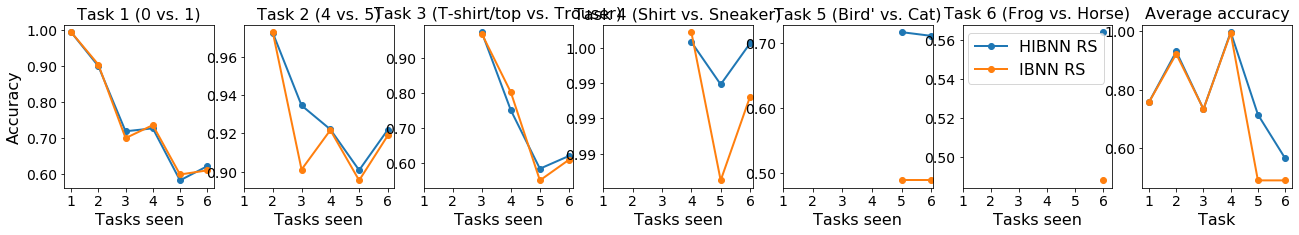

In [46]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (4 vs. 5)",
          2: "Task 3 (T-shirt/top vs. Trouser)",
          3: "Task 4 (Shirt vs. Sneaker)",
          4: "Task 5 (Bird' vs. Cat)",
          5: "Task 6 (Frog vs. Horse)"}
no_tasks=6
fig, ax = plt.subplots(1, 7, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_rs_acc[:, i]))+1, _hibp_rs_acc[:, i], label='HIBNN RS', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_rs_acc[:, i]))+1, _ibp_rs_acc[:, i], label='IBNN RS', marker='o', linewidth=lw)
    #ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    #ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    #ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_hibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 5:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[6].plot(np.arange(len(__hibp_rs_acc))+1, __hibp_rs_acc, label='HIBNN RS', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__ibp_rs_acc))+1, __ibp_rs_acc, label='IBNN RS', marker='o', linewidth=lw)
#ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h50, label='VCL 50', marker='o', linewidth=lw)
#ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h100, label='VCL 100', marker='o', linewidth=lw)
#ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h400, label='VCL 400', marker='o', linewidth=lw)
ax[6].set_xticks(range(1, len(_hibp_acc)+1))
ax[6].set_title('Average accuracy', fontsize=legend_size)
ax[6].set_xlabel('Task', fontsize=legend_size)
ax[6].tick_params(labelsize=tick_size)
ax[6].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_hibp_cifar_mh_l1.pdf", bbox_inches='tight')
fig.show()

In [47]:
cl1 = False
ind = 0 if cl1 else 1
print("Overall accuracies HIBP: {0:.3f} pm {1:.3f}".format(np.nanmean(hibp_acc[ind, :, :, :]), np.nanmean(np.nanstd(hibp_acc[ind, :, :, :], 0))))
print("Overall accuracies HIBP RS: {0:.3f} pm {1:.3f}".format(np.nanmean(hibp_rs_acc), np.nanmean(np.nanstd(hibp_rs_acc, 0))))
print("Overall accuracies IBP: {0:.3f} pm {1:.3f}".format(np.nanmean(ibp_acc[ind, :, :, :]), np.nanmean(np.nanstd(ibp_acc[ind, :, :, :], 0))))
print("Overall accuracies IBP RS: {0:.3f} pm {1:.3f}".format(np.nanmean(ibp_rs_acc), np.nanmean(np.nanstd(ibp_rs_acc, 0))))
print("Overall accuracies VCL h50: {0:.3f} pm {1:.3f}".format(np.nanmean(vcl_result_h50[ind, :, :, :]), np.nanmean(np.nanstd(vcl_result_h50[ind, :, :, :], 0))))
print("Overall accuracies VCL h100: {0:.3f} pm {1:.3f}".format(np.nanmean(vcl_result_h100[ind, :, :, :]), np.nanmean(np.nanstd(vcl_result_h100[ind, :, :, :], 0))))
print("Overall accuracies VCL h400: {0:.3f} pm {1:.3f}".format(np.nanmean(vcl_result_h400[ind, :, :, :]), np.nanmean(np.nanstd(vcl_result_h400[ind, :, :, :], 0))))

Overall accuracies HIBP: 0.804 pm 0.018
Overall accuracies HIBP RS: 0.815 pm 0.014
Overall accuracies IBP: 0.774 pm 0.016
Overall accuracies IBP RS: 0.787 pm 0.015
Overall accuracies VCL h50: 0.799 pm 0.026
Overall accuracies VCL h100: 0.767 pm 0.102
Overall accuracies VCL h400: 0.831 pm 0.059


In [48]:
mus = [0.799, 0.767, 0.831]
stds = [0.026, 0.102, 0.059]
print([i*100 for i in mix_gaussian_moments(mus, stds)])

[79.9, 7.440654093111281]


In [53]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 6
ticks = [str(i) for i in np.arange(num_tasks)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)
    
Z_hibp = d_rs['Z']
len(Z_hibp)

5

In [54]:
num_layers=2
num_tasks=6
num_runs = 1
_Z_hibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_hibp[i][j])
    _Z_hibp.append(tmp)

In [55]:
__Z_hibp = [np.concatenate(_Z_hibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_hibp[0].shape

(1, 1986, 200)

In [56]:
len(__Z_hibp)

12

In [57]:
__Z_hibp[0].shape

(1, 1986, 200)

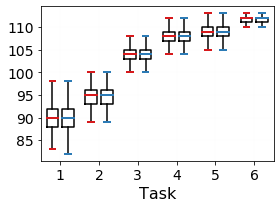

In [58]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(__Z_hibp[2*i] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(__Z_hibp[2*i + 1] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    #plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
#plt.ylabel()
plt.xlim(-1, len(ticks)*2 -1)
plt.xlabel('Task', fontsize=legend_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_mix_hibp_l2_Rs.pdf', bbox_inches='tight')
plt.show()

In [59]:
Z_ibp = d_ibp_rs['Z']
len(Z_ibp)

5

In [60]:
num_layers=2
num_tasks=6
num_runs = 1
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [61]:
_Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
_Z_ibp[0].shape

(1, 1986, 200)

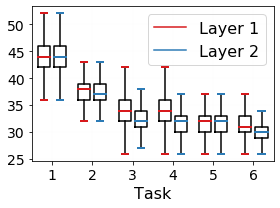

In [62]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(_Z_ibp[2*i] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(_Z_ibp[2*i + 1] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
#plt.ylabel()
plt.xlim(-1, len(ticks)*2 -1)
plt.xlabel('Task', fontsize=legend_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_mix_ibp_l2.pdf', bbox_inches='tight')
plt.show()

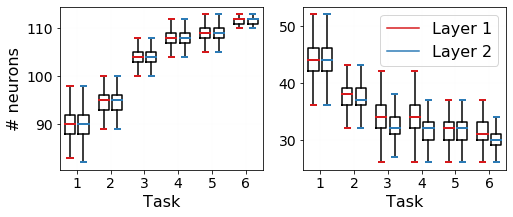

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpl = ax[0].boxplot([np.sum(np.asarray(__Z_hibp[2*i] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[0].boxplot([np.sum(np.asarray(__Z_hibp[2*i + 1] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

bpl = ax[1].boxplot([np.sum(np.asarray(_Z_ibp[2*i] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[1].boxplot([np.sum(np.asarray(_Z_ibp[2*i + 1] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')
ax[1].legend(fontsize=legend_size)
for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
# ax[0].set_yticks(range(40, 90, 10))
# ax[1].set_yticks(range(20, 70, 10))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
# ax[0].set_title('H-IBP', fontsize=legend_size)
# ax[1].set_title('IBP', fontsize=legend_size)
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.savefig('plots/Zs_bp_mix_hibp_ibp_l2.pdf', bbox_inches='tight')
plt.show()

# CL3

In [141]:
with open('results/split_mnist_hibp_l2_mix_alpha020_up_cl3_.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [142]:
cl3 = True
ind = 1 if cl3 else 0
[np.nanmean(d['vcl_baselines'][i][ind,:,:,:]) for i in d['vcl_baselines'].keys()]

[0.3168077908026524, 0.3081482816337354, 0.313279760941493]

In [143]:
d['vcl_ibp'].shape

(2, 5, 6, 6)

In [144]:
cl3 = True
ind = 1 if cl3 else 0
hibp_acc = d['vcl_ibp']
#ibp_acc = d_ibp['vcl_ibp'] 
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d['vcl_baselines'][400]
_hibp_acc = np.mean(hibp_acc[ind, :, :, :], 0)
#_ibp_acc = np.mean(ibp_acc[ind, :, :, :], 0)
_vcl_result_h50 = np.mean(vcl_result_h50[ind, :, :, :], 0)
_vcl_result_h100 = np.mean(vcl_result_h100[ind, :, :, :], 0)
_vcl_result_h400 = np.mean(vcl_result_h400[ind, :, :, :], 0)
__hibp_acc = np.nanmean(hibp_acc[ind, :, :, :], (0,1))
#__ibp_acc = np.nanmean(ibp_acc[ind, :, :, :], (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50[ind, :, :, :], (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100[ind, :, :, :], (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400[ind, :, :, :], (0,1))

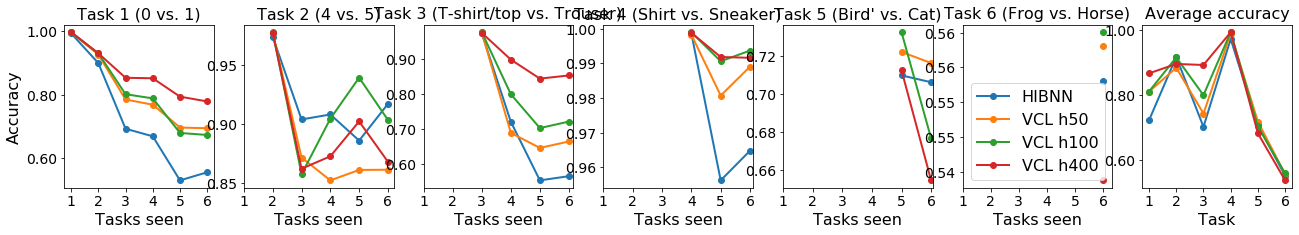

In [145]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (4 vs. 5)",
          2: "Task 3 (T-shirt/top vs. Trouser)",
          3: "Task 4 (Shirt vs. Sneaker)",
          4: "Task 5 (Bird' vs. Cat)",
          5: "Task 6 (Frog vs. Horse)"}
no_tasks=6
fig, ax = plt.subplots(1, 7, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='HIBNN', marker='o', linewidth=lw)
    #ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_hibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 5:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[6].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='HIBNN', marker='o', linewidth=lw)
#ax[6].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h50, label='VCL 50', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h100, label='VCL 100', marker='o', linewidth=lw)
ax[6].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h400, label='VCL 400', marker='o', linewidth=lw)
ax[6].set_xticks(range(1, len(_hibp_acc)+1))
ax[6].set_title('Average accuracy', fontsize=legend_size)
ax[6].set_xlabel('Task', fontsize=legend_size)
ax[6].tick_params(labelsize=tick_size)
ax[6].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_hibp_cifar_mh_l1.pdf", bbox_inches='tight')
fig.show()

In [146]:
cl3 = False
ind = 1 if cl3 else 0
print("Overall accuracies HIBP: {0:.3f} pm {1:.3f}".format(np.nanmean(hibp_acc[ind, :, :, :]), np.nanmean(np.nanstd(hibp_acc[ind, :, :, :], 0))))
#print("Overall accuracies IBP: {0:.3f} pm {1:.3f}".format(np.nanmean(ibp_acc[ind, :, :, :]), np.nanmean(np.nanstd(ibp_acc[ind, :, :, :], 0))))
print("Overall accuracies VCL h50: {0:.3f} pm {1:.3f}".format(np.nanmean(vcl_result_h50[ind, :, :, :]), np.nanmean(np.nanstd(vcl_result_h50[ind, :, :, :], 0))))
print("Overall accuracies VCL h100: {0:.3f} pm {1:.3f}".format(np.nanmean(vcl_result_h100[ind, :, :, :]), np.nanmean(np.nanstd(vcl_result_h100[ind, :, :, :], 0))))
print("Overall accuracies VCL h400: {0:.3f} pm {1:.3f}".format(np.nanmean(vcl_result_h400[ind, :, :, :]), np.nanmean(np.nanstd(vcl_result_h400[ind, :, :, :], 0))))

Overall accuracies HIBP: 0.792 pm 0.016
Overall accuracies VCL h50: 0.821 pm 0.053
Overall accuracies VCL h100: 0.839 pm 0.034
Overall accuracies VCL h400: 0.864 pm 0.027


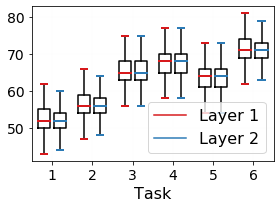

In [137]:
##### Box plot params
grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 6
ticks = [str(i) for i in np.arange(num_tasks)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)
    
Z_hibp = d['Z']

num_layers=2
num_tasks=6
num_runs = 1
_Z_hibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_hibp[i][j])
    _Z_hibp.append(tmp)
    
_Z_hibp = [np.concatenate(_Z_hibp[i], axis=0) for i in range(num_tasks*num_layers)]
_Z_hibp[0].shape

plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(_Z_hibp[2*i] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(_Z_hibp[2*i + 1] > 0.1).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
#plt.ylabel()
plt.xlim(-1, len(ticks)*2 -1)
plt.xlabel('Task', fontsize=legend_size)
plt.tight_layout()
#plt.savefig('plots/Zs_bp_mix_ibp_l2.pdf', bbox_inches='tight')
plt.show()

# Random search

In [3]:
with open('results/split_mnist_rs_hibp_l2_lambda_search_a.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts'])

In [4]:
d['vcl_ibp'].shape

(2, 5, 6, 6)

In [ ]:
np.nanmean()